In [1]:
# Bibliotecas estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, precision_score, 
                             recall_score, f1_score, 
                             precision_recall_curve, RocCurveDisplay)

# Otras bibliotecas
import statsmodels.api as sm


In [3]:
# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv(r'C:\Users\Pc\Documents\Heart_Disease_Cleveland_UCI\heart_cleveland_upload.csv')

# Crear un nuevo DataFrame con solo las primeras 209 filas
df_reducido = df.head(209)

# Imprimir el nuevo DataFrame
print(df_reducido)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
204   60    1   3       130   253    0        0      144      1      1.4   
205   60    0   3       158   305    0        2      161      0      0.0   
206   59    1   3       170   326    0        2      140      1      3.4   
207   59    1   3       135   234    0        0      161      0      0.5   
208   59    1   3       110   239    0        2      142      1      1.2   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [5]:
# 1. Información general del DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

In [7]:
# 2. Comprobar valores nulos
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


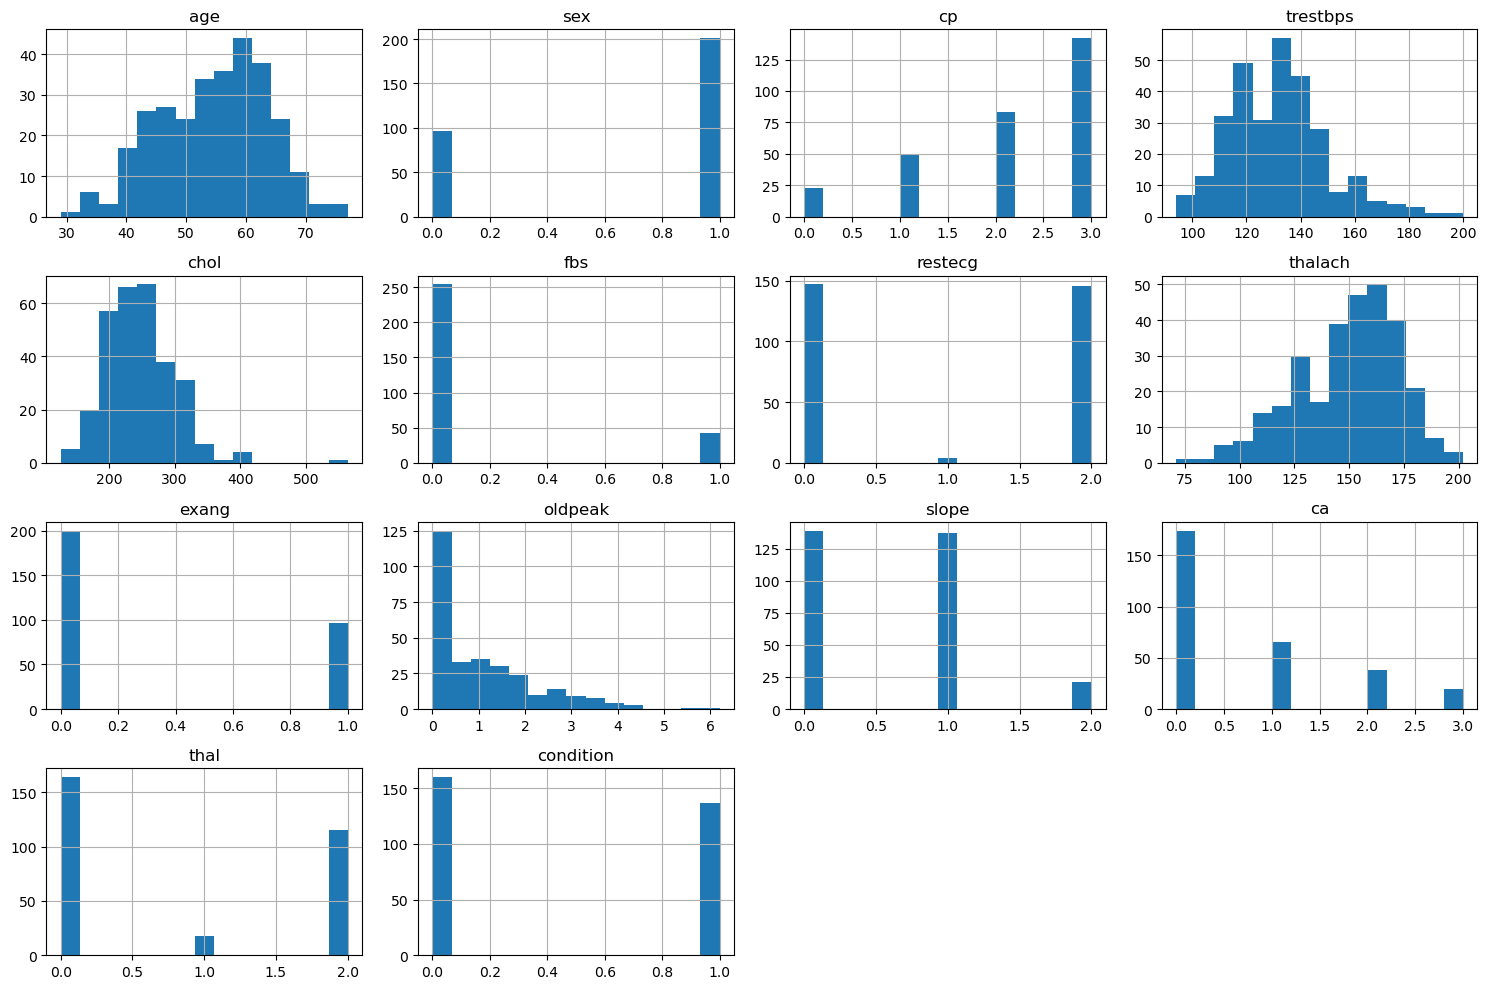

In [9]:
# 3. Histogramas para todas las columnas numéricas
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

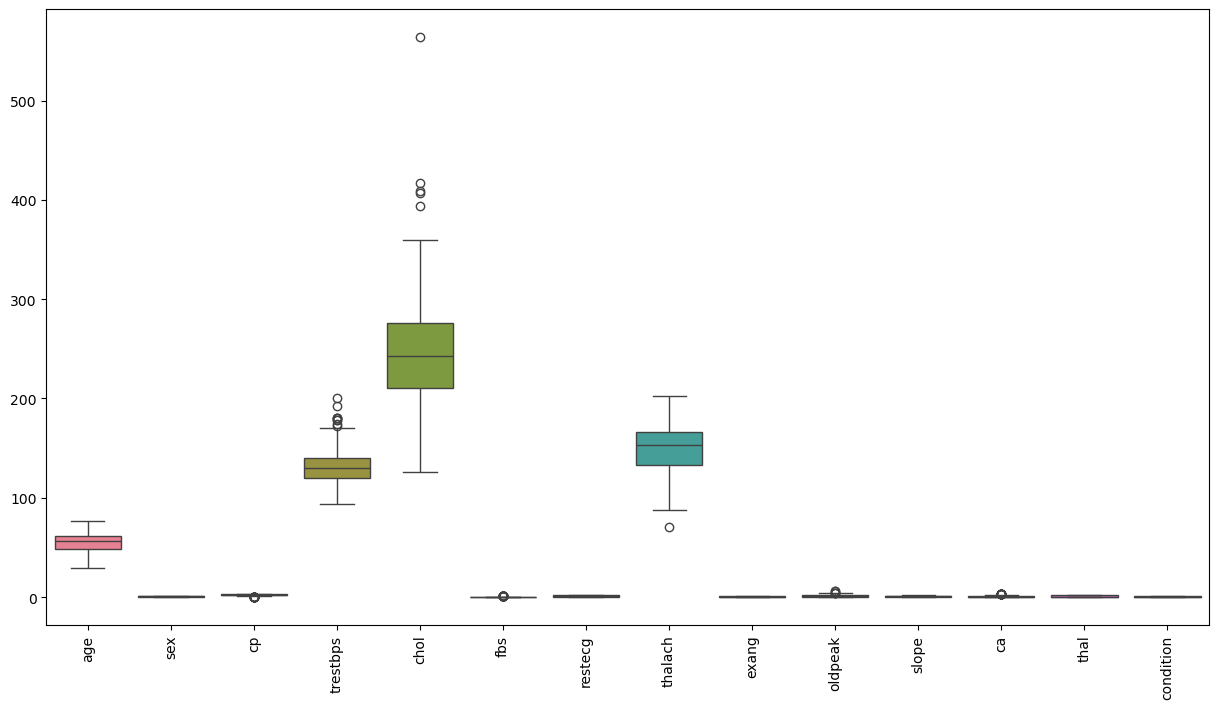

In [13]:
# 4. Boxplots para cada variable numérica
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

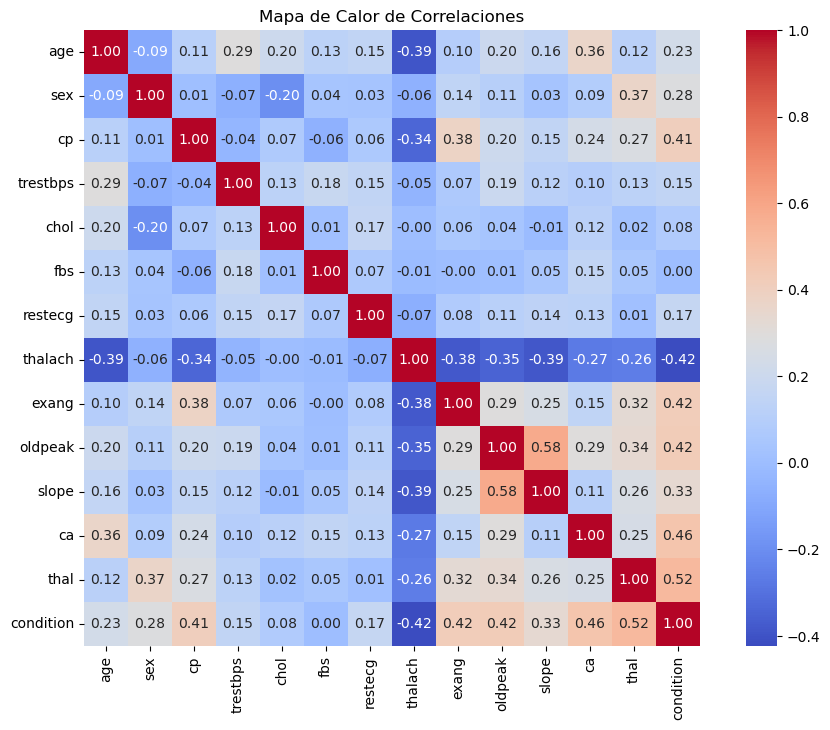

In [15]:
# 5. Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

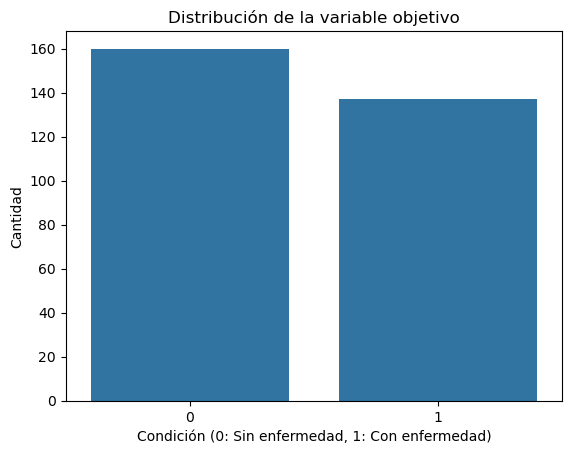

In [17]:
# 6. Distribución de la variable objetivo
sns.countplot(x='condition', data=df)  # Cambia 'condition' por el nombre correcto si es diferente
plt.title('Distribución de la variable objetivo')
plt.xlabel('Condición (0: Sin enfermedad, 1: Con enfermedad)')
plt.ylabel('Cantidad')
plt.show()

In [19]:
# 2. Comprobar valores nulos
null_values = df.isnull().sum()
print("Valores nulos por columna:\n", null_values)

Valores nulos por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [21]:
# Imputar valores nulos con la media
df.fillna(df.mean(), inplace=True)

In [23]:
# Mostrar las primeras filas del DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


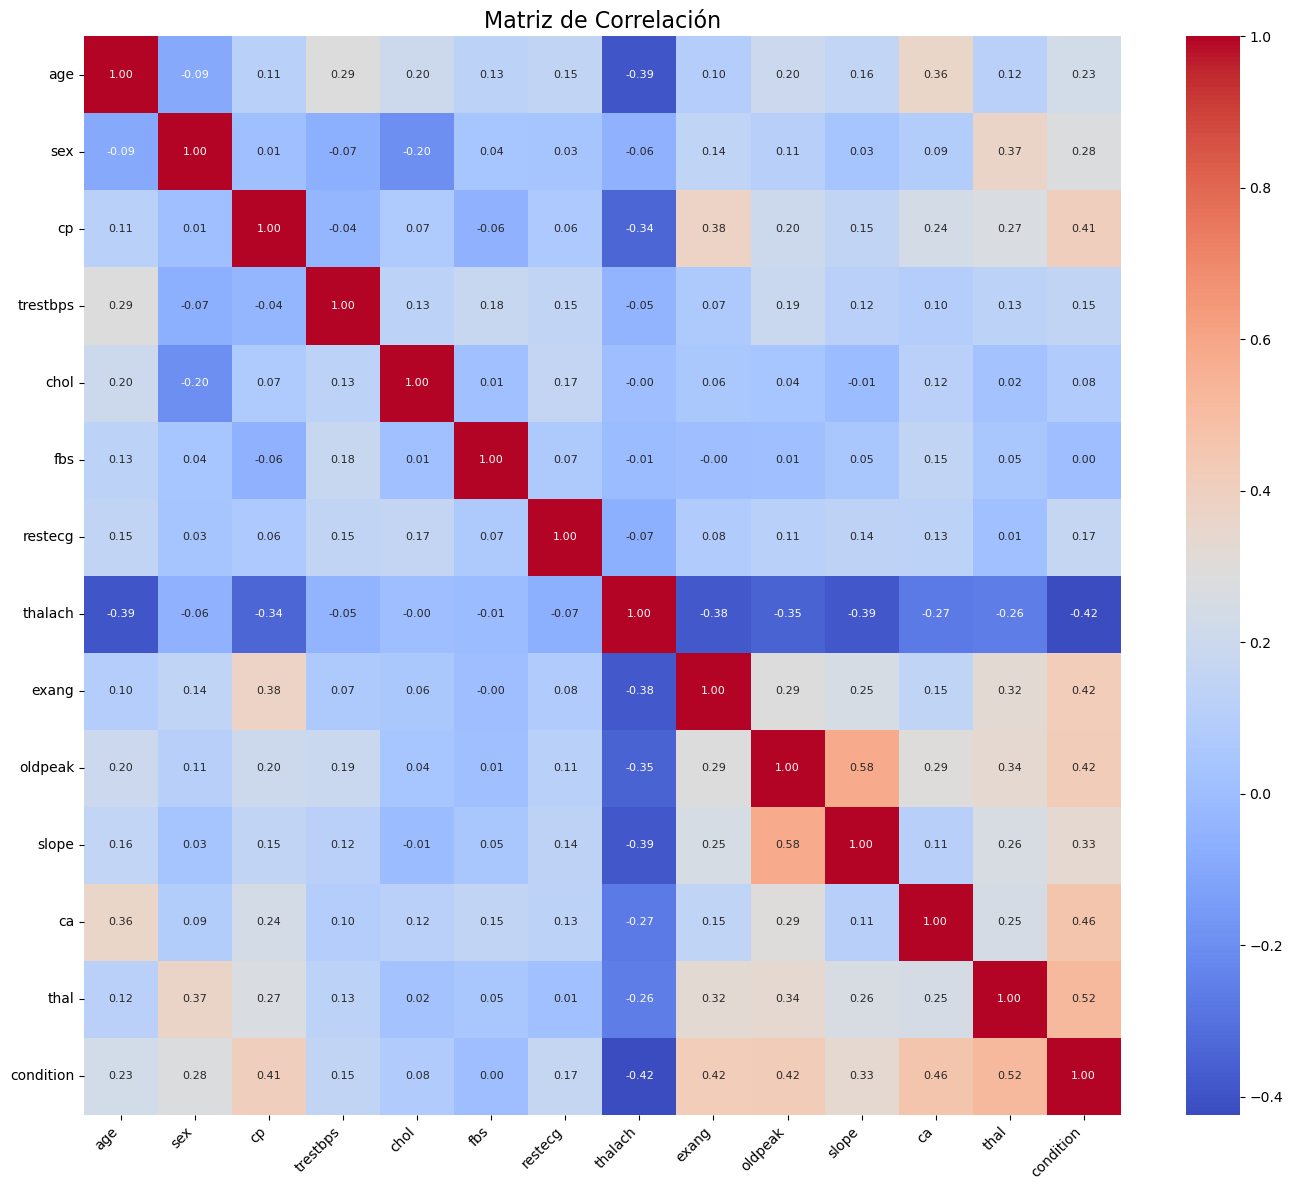

In [25]:
# Matriz de correlación
plt.figure(figsize=(14, 12))  # Aumentar aún más el tamaño de la figura
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})  # Tamaño de anotaciones más pequeño
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar y alinear a la derecha
plt.yticks(rotation=0)  # Mantener etiquetas del eje y horizontales
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

In [27]:
# Separar características y variable objetivo
X = df.drop('condition', axis=1)  # Características
y = df['condition']  # Variable objetivo (presencia de enfermedad cardíaca)
# Imprimir las primeras filas de X y y para verificar
print("Características (X):")
print(X.head())  # Muestra las primeras filas de las características

Características (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  
0   1     0  
1   2     0  
2   0     0  
3   1     0  
4   0     0  


In [29]:
print("\nVariable objetivo (y):")
print(y.head())  # Muestra las primeras filas de la variable objetivo


Variable objetivo (y):
0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64


In [31]:
# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Imprimir la forma de los conjuntos resultantes
print("Conjunto de entrenamiento (X_train):", X_train.shape)
print("Conjunto de prueba (X_test):", X_test.shape)
print("Variable objetivo de entrenamiento (y_train):", y_train.shape)
print("Variable objetivo de prueba (y_test):", y_test.shape)

Conjunto de entrenamiento (X_train): (237, 13)
Conjunto de prueba (X_test): (60, 13)
Variable objetivo de entrenamiento (y_train): (237,)
Variable objetivo de prueba (y_test): (60,)


In [35]:
# Crear el modelo con hiperparámetros
modelo = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train);  # Entrenamos el modelo con los datos de entrenamiento

In [37]:
predicciones = modelo.predict(X_test)
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Realiza las predicciones
predicciones = modelo.predict(X_test)

In [39]:
# Calcula las métricas
precision = precision_score(y_test, predicciones, average='weighted')
recall = recall_score(y_test, predicciones, average='weighted')
f1 = f1_score(y_test, predicciones, average='weighted')

In [41]:
# Imprimir las métricas
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precisión: 0.74
Recall: 0.73
F1-Score: 0.73


In [43]:
# Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, predicciones))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [45]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

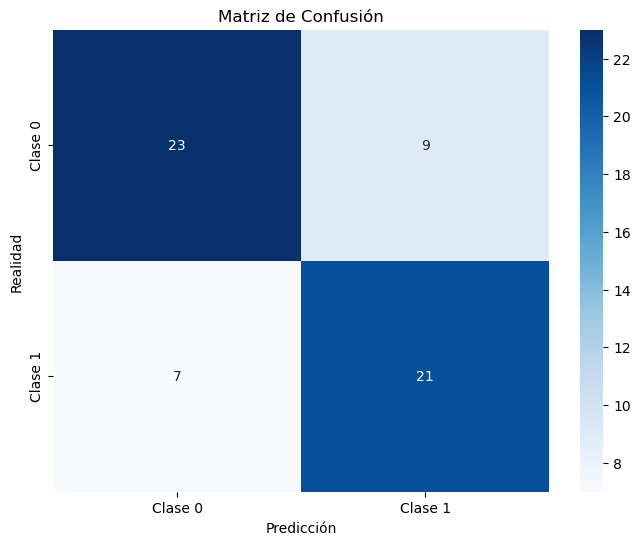

In [47]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [49]:
# Obtener las probabilidades de predicción para la clase positiva
predicciones_prob = modelo.predict_proba(X_test)[:, 1]

In [51]:
# Calcular precisión, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_test, predicciones_prob)

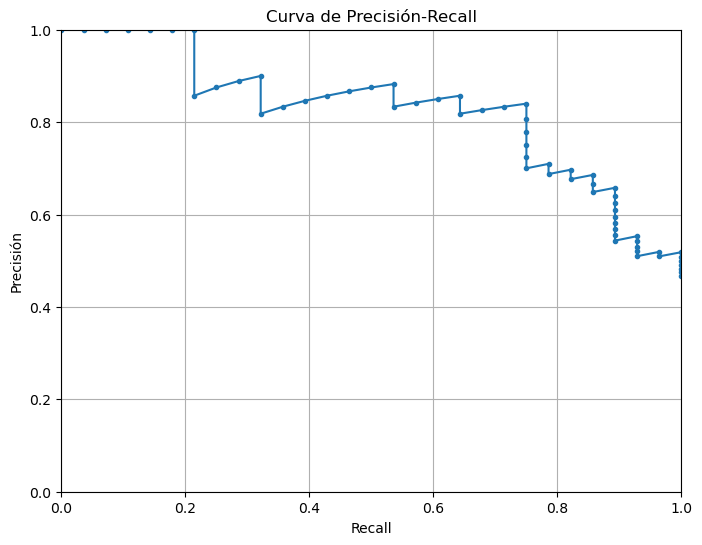

In [55]:
# Graficar la curva de precisión-recall con una línea suave
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', linestyle='-')
plt.title('Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

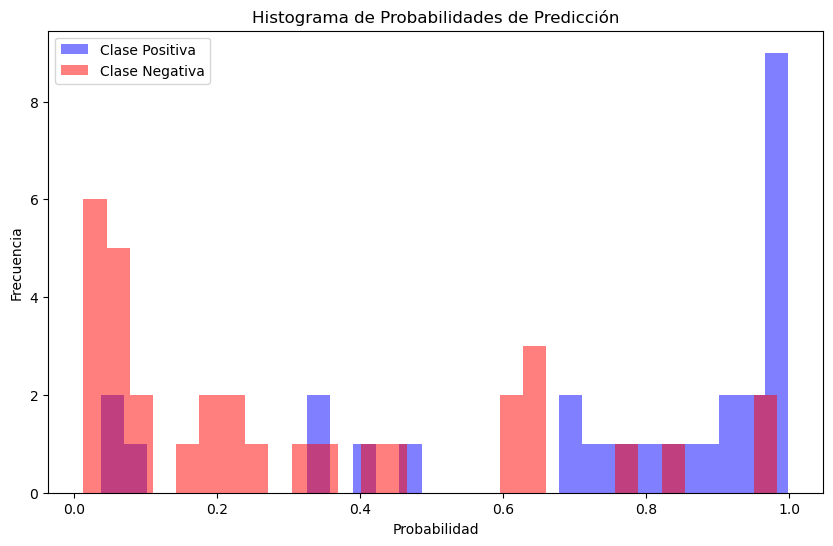

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(predicciones_prob[y_test == 1], bins=30, alpha=0.5, color='blue', label='Clase Positiva')
plt.hist(predicciones_prob[y_test == 0], bins=30, alpha=0.5, color='red', label='Clase Negativa')
plt.title('Histograma de Probabilidades de Predicción')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
Análisis de 298 filas

Edad (age)
Sexo (sex)
Tipo de dolor en el pecho (cp)
Presión arterial en reposo (trestbps)
Colesterol (chol)
Azúcar en sangre en ayunas (fbs)
Resultados de electrocardiograma (restecg)
Frecuencia cardíaca máxima (thalach)
Angina inducida por ejercicio (exang)
Depresión del segmento ST (oldpeak)
Pendiente del segmento ST (slope)
Número de vasos sanguíneos principales (ca)
Tipo de enfermedad cardíaca (thal)
Condición (condition)
Distribución de Variables

Edad: distribución normal, con concentración en la mediana edad
Presión arterial: distribución ligeramente sesgada hacia la derecha
Colesterol: distribución ligeramente sesgada hacia la derecha, con valores atípicos
Frecuencia cardíaca máxima: distribución normal
Valores Atípicos

Valores extremadamente altos en colesterol
Valores atípicos en presión arterial y frecuencia cardíaca máxima
Correlaciones

La edad, presión arterial, colesterol y frecuencia cardíaca máxima están relacionadas con la presencia de enfermedad cardíaca
Matriz de correlación: base sólida para construir un modelo de predicción
Modelo de Clasificación

Precisión: 73%
Macro average: 0.73
Weighted average: 0.73
F1-score: 0.73
Conclusiones

La enfermedad cardíaca está presente en aproximadamente la mitad de los pacientes
Factores de riesgo: valores altos de presión arterial, colesterol y edad avanzada
Modelo predictivo: útil para predecir la presencia de enfermedad cardíaca
Mejora continua: margen para mejorar el modelo considerando variables adicionales y ajustes
Distribución de la Variable Objetivo

Categoría 0 (Sin enfermedad): representa aproximadamente la mitad de los pacientes
Categoría 1 (Con enfermedad): representa aproximadamente la mitad de los pacientes
Análisis del Histograma de Probabilidades de Predicción

Eje X: probabilidad asignada por el modelo a cada instancia de pertenecer a la clase positiva
Eje Y: frecuencia con la que se obtiene una determinada probabilidad
Barras azules: instancias clasificadas como positivas
Barras rojas: instancias clasificadas como negativas
Mapa de Calor de Correlaciones

Correlación: cada celda representa la correlación entre dos variables
Intensidad de la correlación: color de cada celda indica la fuerza de la correlación
Matriz de Confusión

Precisión del modelo: buen desempeño, clasificando correctamente la mayoría de los casos
Tipos de errores: identificados casos en los que el modelo se equivocó
Desequilibrios: observados si el modelo tenía preferencia por una clase en particular
Curva de Precisión-Recall

Forma de la curva: decreciente
Extremos de la curva: modelo ideal (alta precisión y alto recall) y modelo que clasifica todos los casos como positivos
